# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [62]:
# Resolver acá
import pandas as pd

# Cargamos el archivo csv
df = pd.read_csv("C:/Users/Elina-pc/Documents/CIENCIA DE DATOS/TP2/Base Airbnb NY.csv")
df

#Tengan en cuenta si hay valores duplicados y eliminénlos.

# Nos muestras cuntas filas duplicadas hay en nuestro df: Son 10
duplicados = df.duplicated()
print(duplicados.sum())

# Vemos que datos estan duplicados
df_duplicados = df[df.duplicated()]
df_duplicados

#Eliminadmos los datos valores duplicados 
df1 = df.drop_duplicates() 
df1

duplicados = df1.duplicated()
print(duplicados.sum())

#################################################
# Eliminen las columnas que no tienen información de interés.

#Eliminamos las columnas de no interes
columns_to_drop = ["id", "host_id","last_review"]  
airbnb_limpio = df.drop(columns=columns_to_drop)
airbnb_limpio

######################################
# Si hay observaciones con outliers o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.

# Definir el rango intercuartil
Q1 = airbnb_limpio['price'].quantile(0.25)
Q3 = airbnb_limpio['price'].quantile(0.75)
IQR = Q3 - Q1

# Determinar los límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos que están dentro de los límites (no outliers)
airbnb_limpio_so = airbnb_limpio[(airbnb_limpio['price'] >= lower_bound) & (airbnb_limpio['price'] <= upper_bound)]

# Mostrar el nuevo DataFrame sin outliers
airbnb_limpio_so


#######################################
# Transformen las variables ‘neighbourhood_group’ y ‘room_type’ a variables numericas.

# Crear un diccionario para asignar números a cada barrio
barrio_a_numero = {
    'Brooklyn': 1,
    'Queens': 2,
    'Manhattan': 3,
    'Bronx': 4,
    'Staten Island': 5
}

# Reemplazar los valores de 'neighbourhood_group' con los números asignados
airbnb_limpio_so.loc[:, 'neighbourhood_group'] = airbnb_limpio_so['neighbourhood_group'].map(barrio_a_numero)

# Mostrar el DataFrame actualizado de kos barrios
airbnb_limpio_so

# Crear un diccionario para asignar números a los tipos de cuarto
cuarto_a_numero = {
    'Private room': 1,
    'Shared room': 2,
    'Entire home/apt': 3
}

# Reemplazar los valores de 'neighbourhood_group' con los números asignados
airbnb_limpio_so.loc[:,'room_type'] = airbnb_limpio_so['room_type'].map(cuarto_a_numero)

# Mostrar el DataFrame actualizado
airbnb_limpio_so


#################
#Con la ayuda de los comandos groupby y join o merge, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna offer group

# Agrupar por 'neighbourhood_group' y contar la cantidad de oferentes
oferta = airbnb_limpio_so.groupby('neighbourhood_group').size().reset_index(name='offer_group')

# Combinar el conteo con el DataFrame original usando merge
airbnb_limpio_so = airbnb_limpio_so.merge(oferta, on='neighbourhood_group', how='left')

# Mostrar el DataFrame con la nueva columna
airbnb_limpio_so

10
0


,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,offer_group
0,Clean & quiet apt home by the park,John,1,Kensington,40.64749,-73.97237,1,149.0,1,9,0.21,6,365,19411
1,Skylit Midtown Castle,Jennifer,3,Midtown,40.75362,-73.98377,3,225.0,1,45,0.38,2,355,19509
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,3,Harlem,40.80902,-73.94190,1,150.0,3,0,NaN,1,365,19509
3,Cozy Entire Floor of Brownstone,LisaRoxanne,1,Clinton Hill,40.68514,-73.95976,3,89.0,1,270,4.64,1,194,19411
4,Entire Apt: Spacious Studio/Loft by central park,Laura,3,East Harlem,40.79851,-73.94399,3,80.0,10,9,0.10,1,0,19509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,Perfect ap in Manhattan! Walking to Central Park!,Val,3,Upper East Side,40.76811,-73.95194,3,150.0,3,10,0.54,2,89,19509
45914,Upper East Side Apt By The Water,Caitlin,3,Upper East Side,40.77001,-73.94915,3,150.0,1,1,1.00,1,130,19509
45915,Comfy Apt in NYC Brownstone,Joyce,3,Murray Hill,40.74812,-73.97663,3,150.0,3,57,3.07,2,49,19509
45916,The spot,Emma,1,Prospect-Lefferts Gardens,40.65595,-73.95412,1,50.0,7,1,0.94,1,125,19411


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

In [74]:
#!pip install pandas
#!pip install matplotlib
#!pip install numpy
#!pip install scikit-learn
#!pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

  neighbourhood_group  latitude  longitude room_type  price  minimum_nights  \
0                   1  40.64749  -73.97237         1  149.0               1   
1                   3  40.75362  -73.98377         3  225.0               1   
2                   3  40.80902  -73.94190         1  150.0               3   
3                   1  40.68514  -73.95976         3   89.0               1   
4                   3  40.79851  -73.94399         3   80.0              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0                NaN                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  
0               365  
1               355  
2       

Text(0.5, 1.0, 'Matriz de correlacion')

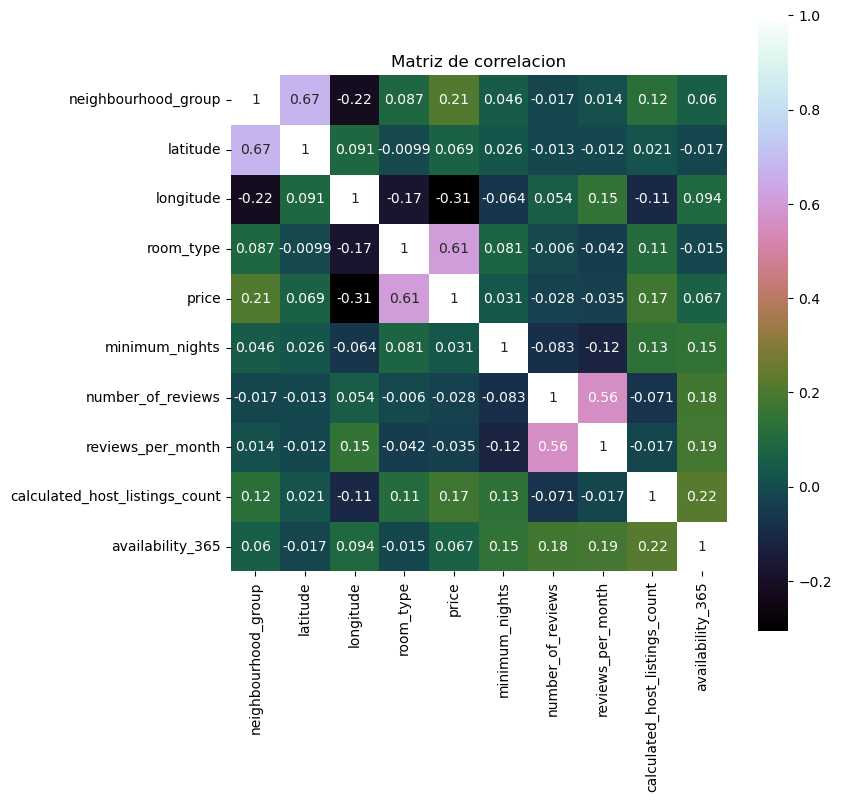

In [87]:
# Resolver acá

#QUEDARNOS CON LAS VAR NUMERICAS Y CREAMOS NUESTRA MATRIZ X
var = airbnb_limpio_so[["neighbourhood_group", "latitude", "longitude", "room_type","price", "minimum_nights", "number_of_reviews", "reviews_per_month","calculated_host_listings_count" , "availability_365"]]
print(var.head())
var.shape

# CORRELACION
correlacion = var.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlacion, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Matriz de correlacion')

#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

neighbourhood_group
3    0.424866
1    0.422732
2    0.121194
4    0.023259
5    0.007949
Name: count, dtype: float64


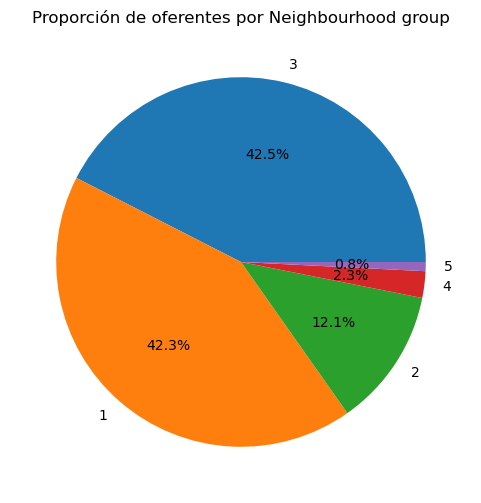

room_type
3    0.496298
1    0.478919
2    0.024783
Name: count, dtype: float64


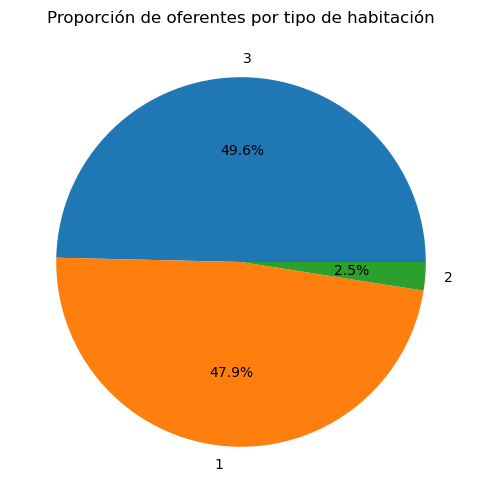

In [93]:
# Resolver acá
# Contar los oferentes por neighbourhood_group
neighbourhood_group_counts = airbnb_limpio_so['neighbourhood_group'].value_counts()

# Calcular la proporción dividiendo por el total de registros
neighbourhood_group_proportion = neighbourhood_group_counts / len(airbnb_limpio_so)

# Mostrar las proporciones
print(neighbourhood_group_proportion)

# Gráfico de la proporción de oferentes por neighbourhood group
neighbourhood_group_proportion.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Proporción de oferentes por Neighbourhood group')
plt.ylabel('')  # Ocultar la etiqueta del eje y
plt.show()

# Contar los oferentes por room_type
room_type_counts = airbnb_limpio_so['room_type'].value_counts()

# Calcular la proporción dividiendo por el total de registros
room_type_proportion = room_type_counts / len(airbnb_limpio_so)

# Mostrar las proporciones
print(room_type_proportion)

# Gráfico de la proporción de oferentes por tipo de habitación
room_type_proportion.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Proporción de oferentes por tipo de habitación')
plt.ylabel('')
plt.show()

#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

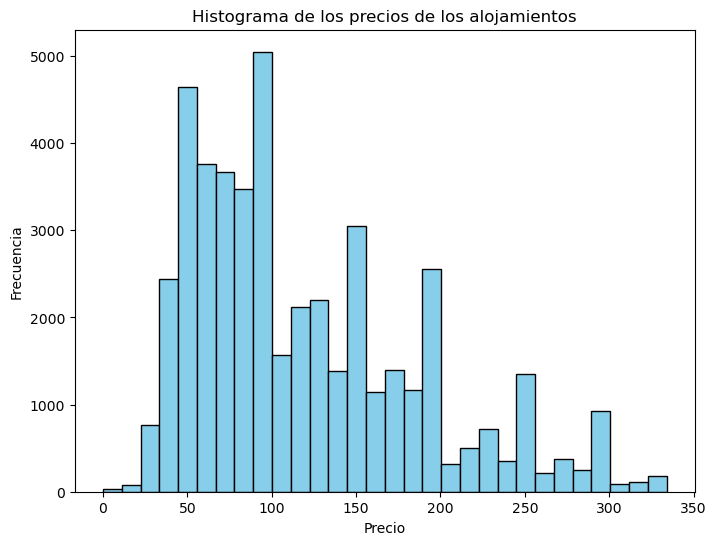

Precio mínimo: 0.0
Precio máximo: 334.0
Precio promedio: 119.97138377107017
Media de precio por Neighbourhood group:
neighbourhood_group
1    105.693061
2     88.920216
3    145.945717
4     77.313670
5     89.235616
Name: price, dtype: float64
Media de precio por tipo de habitación:
room_type
1     79.018508
2     59.293497
3    162.520251
Name: price, dtype: float64


In [104]:
# Resolver acá

# Crear el histograma de los precios
plt.figure(figsize=(8, 6))
plt.hist(airbnb_limpio_so['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de los precios de los alojamientos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

#El histograma muestra la distribución de los precios de los alojamientos. Es probable que observes una distribución sesgada a la derecha (right-skewed), con muchos alojamientos en el rango de precios bajos, pero algunos con precios significativamente altos (outliers), lo que podría impactar en las métricas como el promedio. Esto suele ser común en plataformas como Airbnb, donde existen propiedades exclusivas o de lujo que tienen precios mucho más altos que el promedio general.

# Calcular el precio mínimo, máximo y promedio
precio_minimo = airbnb_limpio_so['price'].min()
precio_maximo = airbnb_limpio_so['price'].max()
precio_promedio = airbnb_limpio_so['price'].mean()

print(f"Precio mínimo: {precio_minimo}")
print(f"Precio máximo: {precio_maximo}")
print(f"Precio promedio: {precio_promedio}")

# Calcular la media de precio por Neighbourhood group
media_precio_neighbourhood = airbnb_limpio_so.groupby('neighbourhood_group')['price'].mean()

print("Media de precio por Neighbourhood group:")
print(media_precio_neighbourhood)

# Calcular la media de precio por tipo de habitación
media_precio_room_type = airbnb_limpio_so.groupby('room_type')['price'].mean()

print("Media de precio por tipo de habitación:")
print(media_precio_room_type)

#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

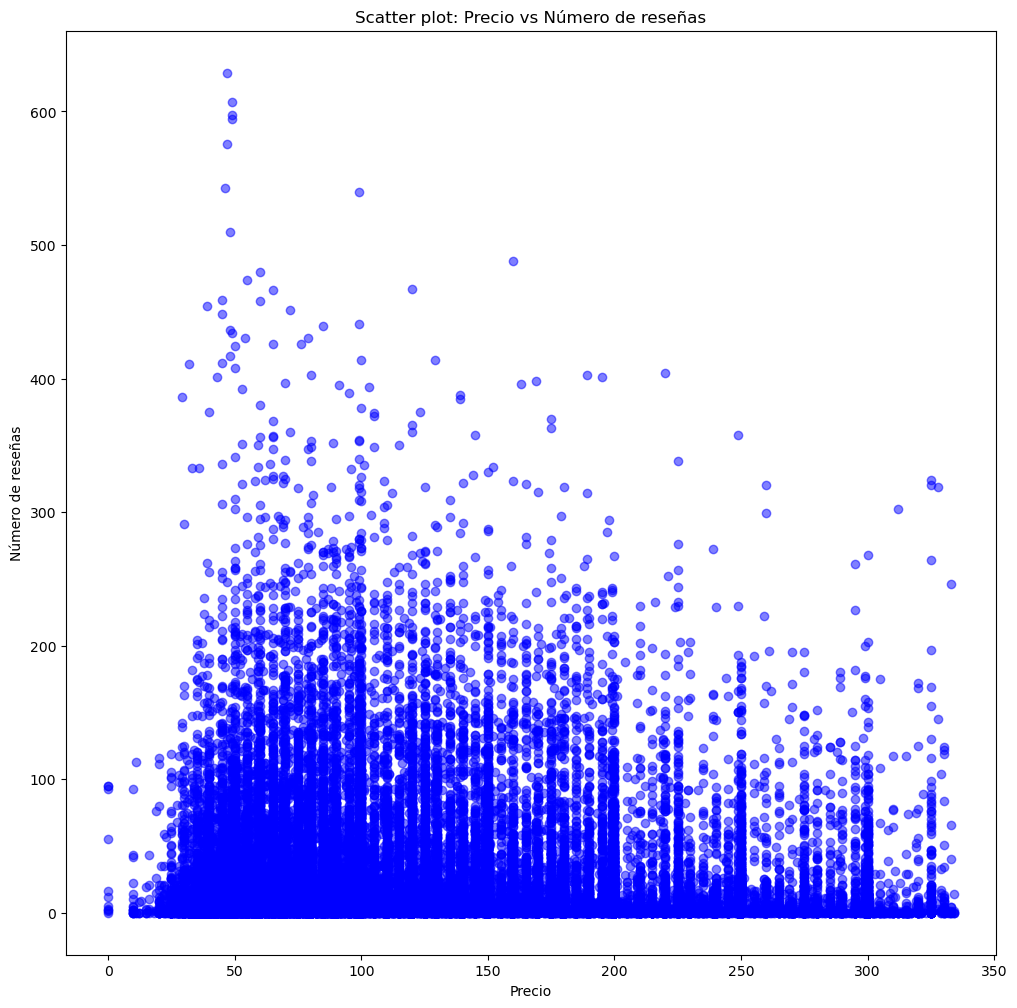

In [127]:
# Resolver acá

# Scatter plot de Precio vs Número de reseñas
plt.figure(figsize=(12, 12))
plt.scatter( airbnb_limpio_so['price'], airbnb_limpio_so['number_of_reviews'], color='blue', alpha=0.5)
plt.title('Scatter plot: Precio vs Número de reseñas')
plt.ylabel('Número de reseñas')
plt.xlabel('Precio')
plt.show()

#En este gráfico podríamos observar si los alojamientos con un precio más bajo tienden a tener más reseñas, lo que puede ser indicativo de popularidad debido a su accesibilidad económica

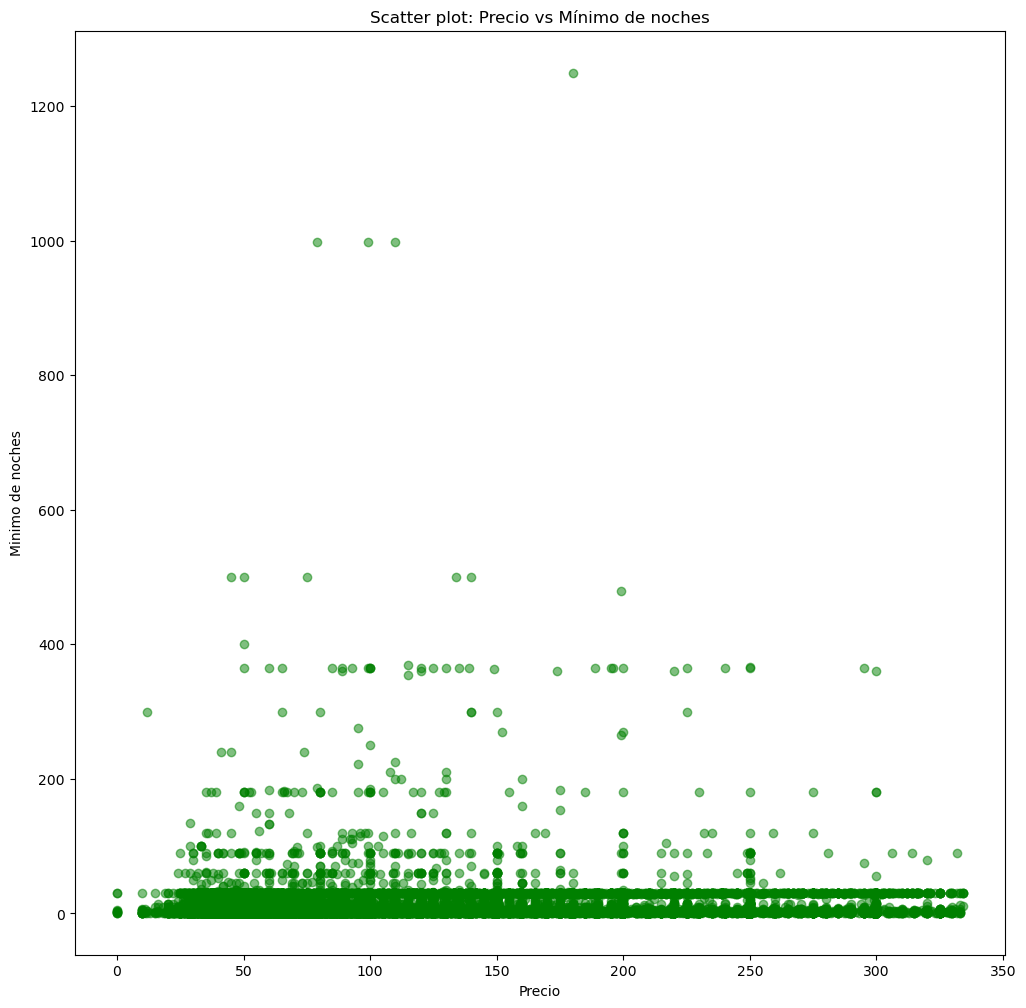

In [134]:
# Scatter plot de Precio vs Mínimo de noches
plt.figure(figsize=(12,12))
plt.scatter(airbnb_limpio_so['price'], airbnb_limpio_so['minimum_nights'], color='green', alpha=0.5)
plt.title('Scatter plot: Precio vs Mínimo de noches')
plt.ylabel('Minimo de noches')
plt.xlabel('Precio')
plt.show()

#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.impute import SimpleImputer


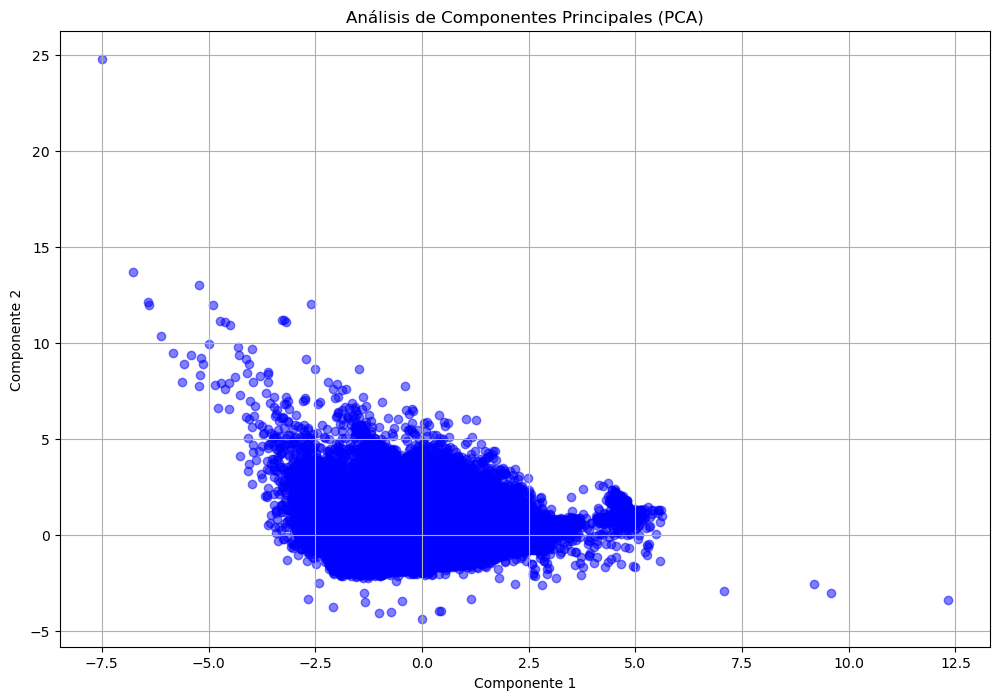

Varianza explicada por el Componente 1: 0.21
Varianza explicada por el Componente 2: 0.17
Varianza total explicada por los dos componentes: 0.38
Loadings:
                                Componente 1  Componente 2
neighbourhood_group                 0.430690      0.268807
latitude                            0.285609      0.253869
longitude                          -0.351013      0.118215
room_type                           0.427462      0.029699
price                               0.510279      0.073984
minimum_nights                      0.166298     -0.056617
number_of_reviews                  -0.174249      0.588313
reviews_per_month                  -0.195058      0.600345
calculated_host_listings_count      0.263678      0.077336
availability_365                    0.031975      0.356722


In [257]:
# Resolver acá
# Seleccionamos las columnas numéricas que usaremos en el PCA
variables_numericas = airbnb_limpio_so[['neighbourhood_group', 'latitude', 'longitude',
    'room_type', 'price', 'minimum_nights',
    'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365'
]]

# Crear un imputador que reemplace NaN con la mediana de cada columna
imputer = SimpleImputer(strategy='median')

# Aplicar el imputador a las variables numéricas
variables_numericas_imputadas = imputer.fit_transform(variables_numericas)

# Estandarizamos los datos
scaler = StandardScaler()
variables_numericas_escaladas = scaler.fit_transform(variables_numericas_imputadas)

# Aplicamos PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(variables_numericas_escaladas)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=componentes_principales, columns=['Componente 1', 'Componente 2'])

# Graficamos los componentes principales
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['Componente 1'], pca_df['Componente 2'], c='blue', alpha=0.5)
plt.title('Análisis de Componentes Principales (PCA)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.show()

# Porcentaje de la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_

print(f"Varianza explicada por el Componente 1: {varianza_explicada[0]:.2f}")
print(f"Varianza explicada por el Componente 2: {varianza_explicada[1]:.2f}")
print(f"Varianza total explicada por los dos componentes: {sum(varianza_explicada):.2f}")

# Obtener los loadings
loadings = pd.DataFrame(pca.components_.T, columns=['Componente 1', 'Componente 2'], index=variables_numericas.columns)
print("Loadings:")
print(loadings)

### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [ ]:
# Resolver acá


#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [287]:
# Resolver acá
from sklearn.model_selection import train_test_split

# Definir la variable dependiente (y) y las variables independientes (X)
y = airbnb_limpio_so['price']  # Variable dependiente
X = variables_numericas.drop('price', axis=1)    # Variables independientes

# Crear un imputador que reemplace NaN con la mediana de cada columna
imputer = SimpleImputer(strategy='median')

# Aplicar el imputador a X
X = imputer.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba (70% y 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=201)

# Agregar una columna de unos a X_train para el intercepto
X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)

# Si es necesario, también agregamos una columna de unos a X_test
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

# Verificar las formas de las matrices resultantes
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_test: {y_test.shape}")


Forma de X_train: (32142, 10)
Forma de y_train: (32142,)
Forma de X_test: (13776, 10)
Forma de y_test: (13776,)


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [239]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [289]:
# Resolver acá
# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones con el conjunto de datos de prueba
y_pred = modelo.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Imprimir los coeficientes del modelo
print(f"Intercepto: {modelo.intercept_}")
print(f"Coeficientes: {modelo.coef_}")

Error cuadrático medio (MSE): 2578.4146083751407
Coeficiente de determinación (R^2): 0.4399813120772731
Intercepto: -23938.39782636676
Coeficientes: [ 0.00000000e+00  4.86870023e+00  5.81408333e+01 -2.92056943e+02
  3.88584366e+01 -1.77235849e-01 -4.19048958e-02  2.93243303e-01
  1.50641711e-01  4.58277836e-02]
